In [10]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import boruta
import process_data

In [147]:
def feature_selection(model,X,y,scaling):
    model_name=model[0]
    model_=model[1]
    feature_names=np.array(X.columns).flatten()
    if (scaling=='Standard'):
        X=StandardScaler().fit_transform(X)
    elif (scaling=='Max'):
        X=MaxAbsScaler().fit_transform(X)
    model_=model_.fit(X,y)
    importance=np.abs(model_.coef_.flatten())
    feature_names=feature_names[np.argsort(importance)]
    importance=np.sort(importance)
    selected_coefs = pd.DataFrame(
    importance[-100:],
    columns=["Coefficients importance"],
    index=feature_names[-100:],
    )
    selected_coefs.plot.barh(figsize=(20, 20))
    plt.title(model_name+" model")
    plt.xlabel("Raw coefficient values")
    plt.axvline(x=0, color=".5")
    plt.subplots_adjust(left=0.3)
    selected_genes=list(selected_coefs.index)
    return selected_genes,model_

In [148]:
def model_eval (model,X,y,scaling):
    if (scaling=='Standard'):
        X=StandardScaler().fit_transform(X)
    elif (scaling=='Max'):
        X=MaxAbsScaler().fit_transform(X)
    return accuracy_score(model.predict(X),y) 

In [64]:
my_data=process_data.process('all_data.csv')
X,y=process_data.split_x_y(my_data)
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.1)

In [65]:
X_s=MaxAbsScaler().fit_transform(X_train)

### XGboost & shap values

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
XGBoost=GradientBoostingClassifier(n_estimators=100)
XGBoost=XGBoost.fit(X_train,y_train)

NameError: name 'X' is not defined

In [ ]:
y_pred=XGBoost.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train=XGBoost.predict(X_train)
print('accuracy ',accuracy_score(y_pred=y_pred_train,y_true=y_train))

accuracy  1.0


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy ',accuracy_score(y_pred=y_pred,y_true=y_test))

accuracy  0.56


In [ ]:
import shap
#shap values
# Fits the explainer
explainer = shap.TreeExplainer(XGBoost)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

ModuleNotFoundError: No module named 'shap'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


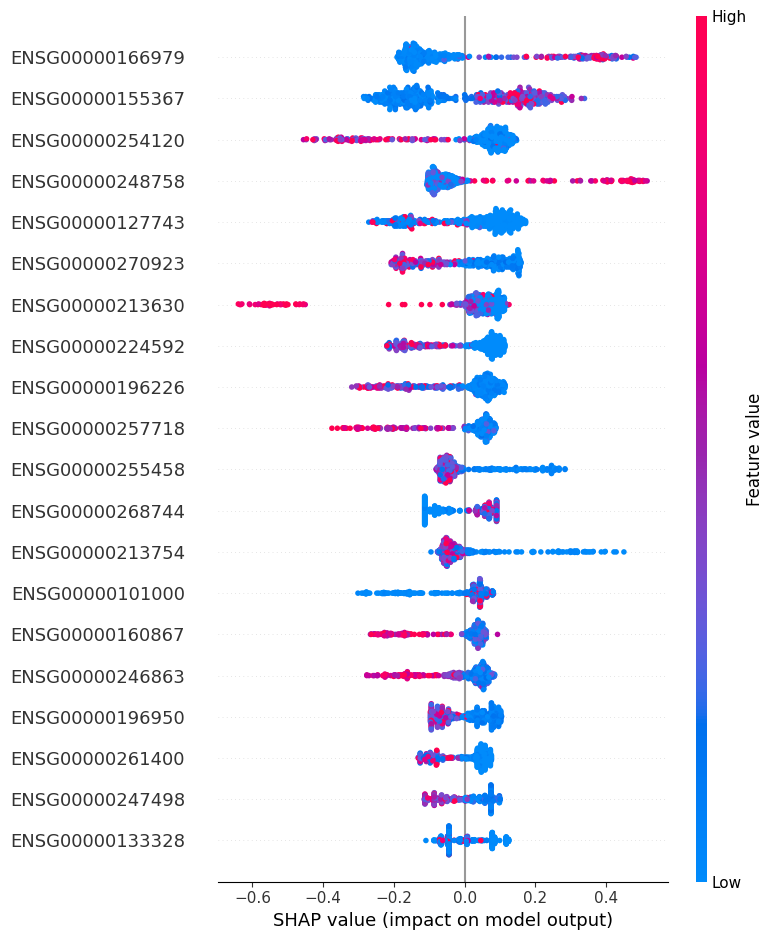

In [ ]:
shap.summary_plot(shap_values,X)

In [ ]:
feature_names=X.columns
top_n = 100
abs_shap_values = np.abs(shap_values.mean(axis=0))
top_n_idx = np.argsort(abs_shap_values)[-top_n:]
top_n_features = [feature_names[i] for i in top_n_idx]

print("Top %d features: %s" % (top_n, top_n_features))


In [ ]:
top_n_features = [feature_names[i] for i in top_n_idx]

In [ ]:
top_n_features

['ENSG00000155367',
 'ENSG00000269089',
 'ENSG00000152133',
 'ENSG00000206898',
 'ENSG00000189091']

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LassoLars, LassoCV, LassoLarsCV, LogisticRegression
from sklearn.svm import LinearSVC, SVC

### SVM with linear kernel

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X,y=process_data.split_x_y(my_data)
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.1)

In [33]:
lsvc=LogisticRegression().fit(X_train,y_train)

/home/syrine/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(accuracy_score(lsvc.predict(X_test),y_test))

0.66


In [27]:
len(X_test)

50

In [29]:
len(y_test[y_test==1])

23

In [ ]:
importance=np.abs(lsvc.coef_).flatten()
feature_names=np.array(X.columns)

<Figure size 4000x15000 with 0 Axes>

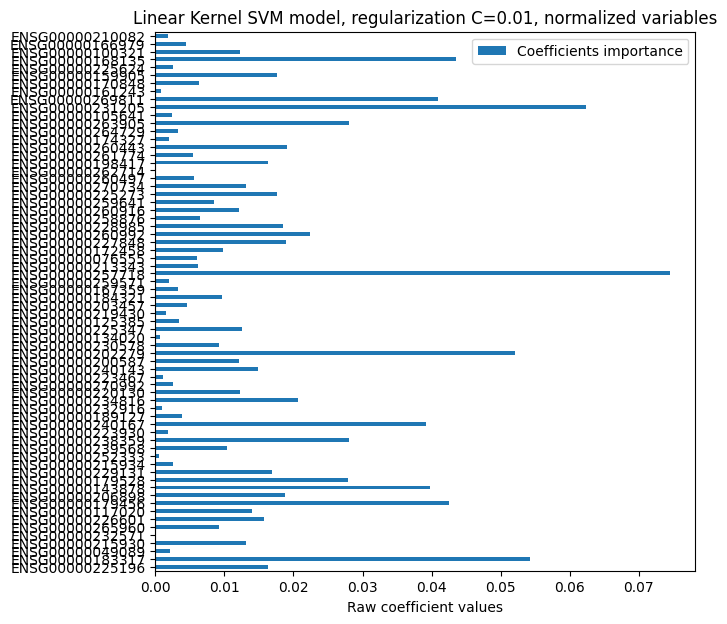

In [ ]:
coefs = pd.DataFrame(
    importance[importance!=0],
    columns=["Coefficients importance"],
    index=feature_names[importance!=0],
)

plt.figure(figsize=(40,150))
coefs.plot.barh(figsize=(9, 7))
plt.title("Linear Kernel SVM model, regularization C=0.01, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [ ]:
gene_list_svc=np.where([importance!=0])[1]

In [ ]:
features_svc=feature_names[gene_list_svc]

### Logistic regression + lasso penalisation

In [152]:
logistic_reg=LogisticRegression(C=0.011)

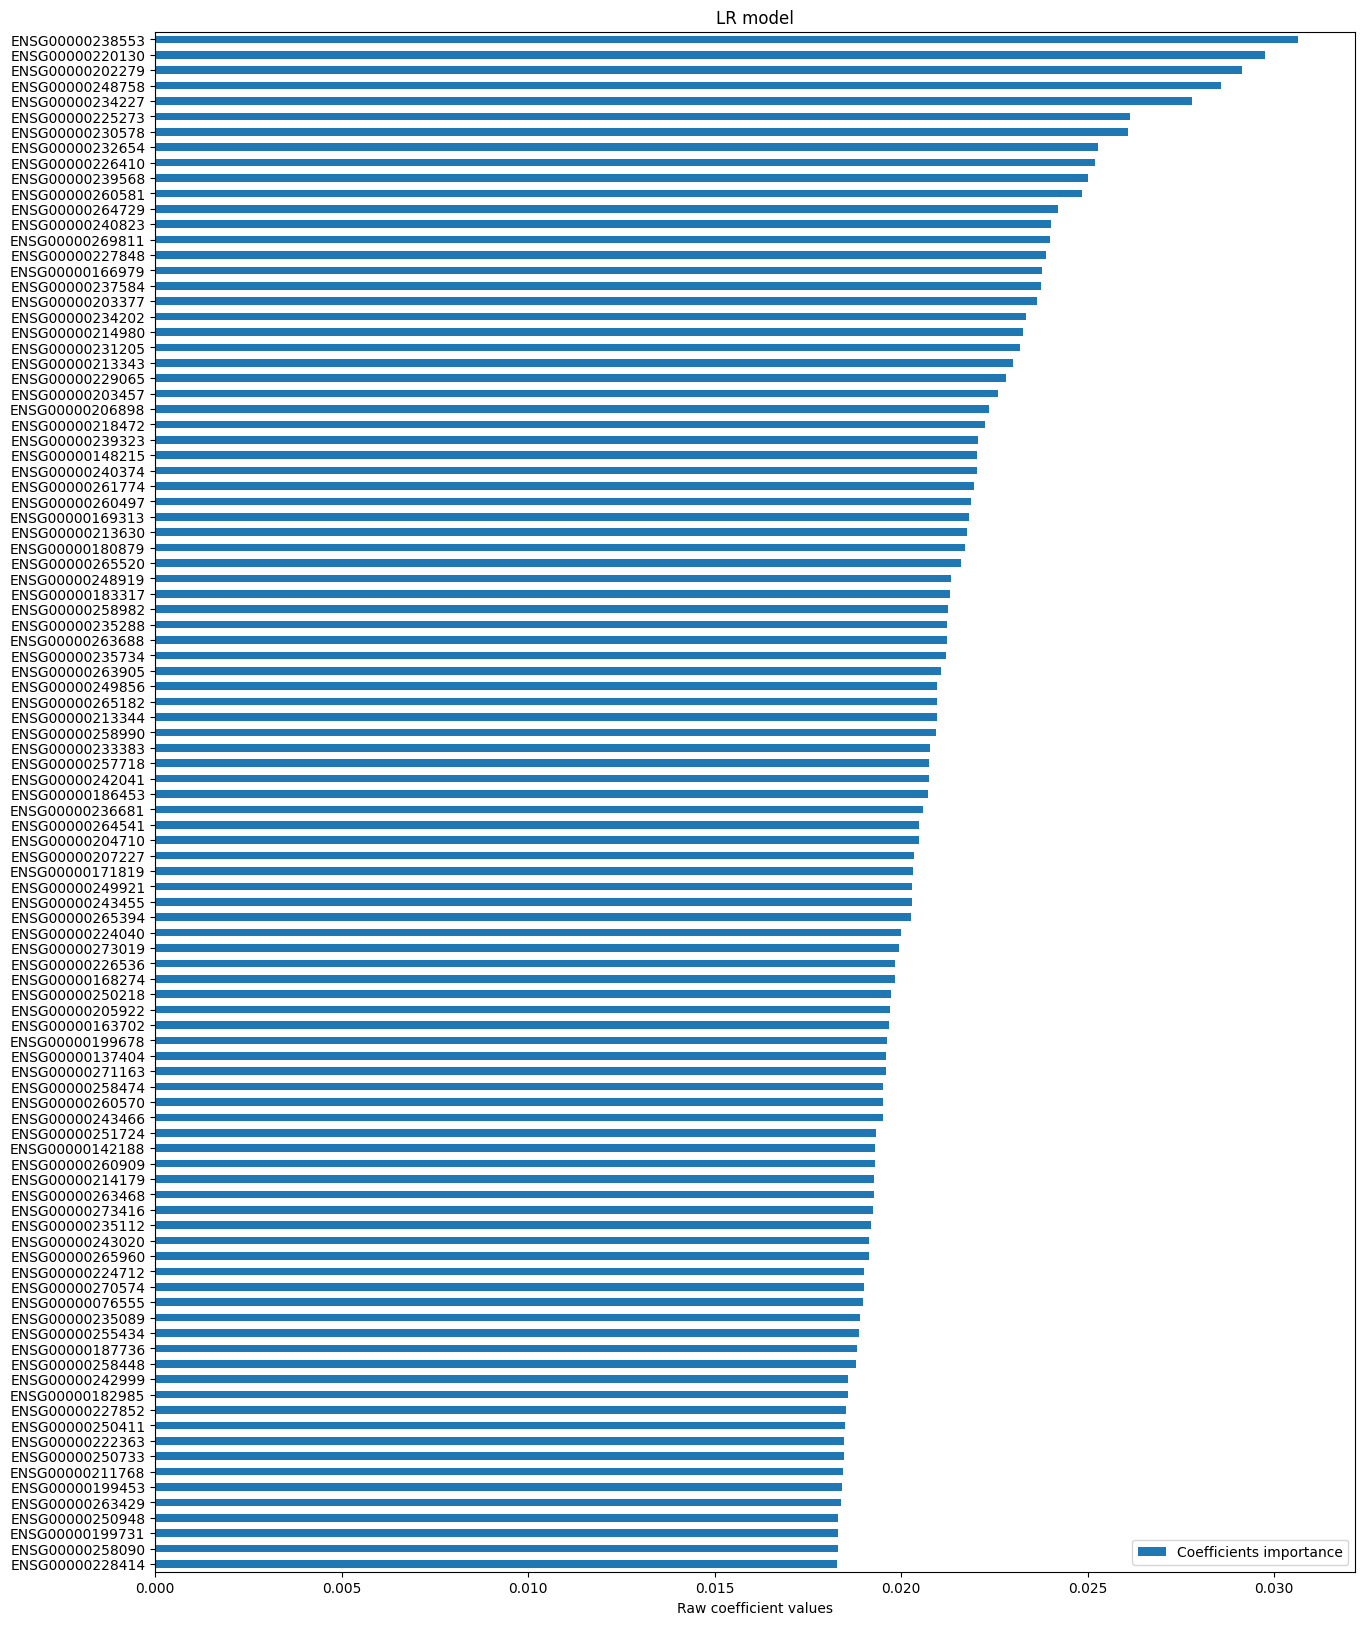

In [153]:
selected_genes,logistic_reg=feature_selection(('LR',logistic_reg),X_train,y_train,'Max')

In [154]:
model_eval(logistic_reg,X_test,y_test,'Max')

0.62

In [ ]:
data_reduced=pd.concat([my_data[selected],my_data['MRD Response']],axis=1)

In [ ]:
data_reduced

,ENSG00000183317,ENSG00000117020,ENSG00000179456,ENSG00000206898,ENSG00000143878,ENSG00000179528,ENSG00000239568,ENSG00000238359,ENSG00000240167,ENSG00000112242,...,ENSG00000198417,ENSG00000260443,ENSG00000263905,ENSG00000231205,ENSG00000269811,ENSG00000170848,ENSG00000168135,ENSG00000100321,ENSG00000166979,MRD Response
Patient_id,,,,,,,,,,,,,,,,,,,,,
165-06,12.925077,0.140193,4.597837,0.000000,1771.632500,0.594664,0.000000,0.532039,0.000000,7.452563,...,0.029292,3.816006,0.188847,0.015978,0.405859,0.183005,0.053590,3.178906,0.076268,0.0
031-31,2.047750,0.069093,0.192206,0.000000,2251.249538,1.098537,0.000000,0.000000,0.129630,5.829706,...,0.000000,0.510473,0.000000,0.000000,0.000000,0.036001,0.000000,0.063947,0.025506,1.0
069-02,2.660103,2.236593,4.957006,0.000000,190.839252,0.367059,0.000000,0.000000,0.386492,5.766801,...,0.496517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.297757,3.308024,1.0
007-08,3.605361,3.363103,3.171844,0.000000,1349.601203,0.588345,0.000000,0.000000,0.000000,11.197650,...,0.076074,0.991056,0.000000,0.010374,0.175676,0.125810,0.034795,3.176161,0.132050,0.0
034-24,2.021929,0.289308,2.569737,0.000000,703.515264,0.701240,0.000000,0.000000,0.000000,14.972768,...,0.141044,0.000000,0.000000,0.000000,0.465303,0.007405,0.000000,3.299234,0.008744,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147-11,0.066482,5.754683,19.789620,0.735268,416.465804,0.857186,0.000000,0.000000,0.603924,9.256157,...,0.078237,0.000000,0.000000,0.042677,0.602237,0.000000,0.000000,0.446878,0.022634,1.0
009-34,0.279484,0.275525,24.061104,0.000000,418.408851,0.081338,0.000000,0.000000,0.185564,3.839662,...,2.580210,0.000000,0.000000,0.000000,0.129532,0.000000,0.000000,0.732316,0.255582,0.0
104-22,0.618255,0.778411,2.366376,0.000000,211.465942,0.236410,0.252982,0.000000,0.220639,12.033758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.891300,12.547102,1.447105,1.0


In [ ]:
import correlations_analysis

Le pourcentage de patients qui sont détectés MRD- est :  52.38095238095239 ,le nombre de patients dans le cluster est :  483
Le pourcentage de patients qui sont détectés MRD- est :  42.857142857142854 ,le nombre de patients dans le cluster est :  7
Le pourcentage de patients qui sont détectés MRD- est :  0.0 ,le nombre de patients dans le cluster est :  1


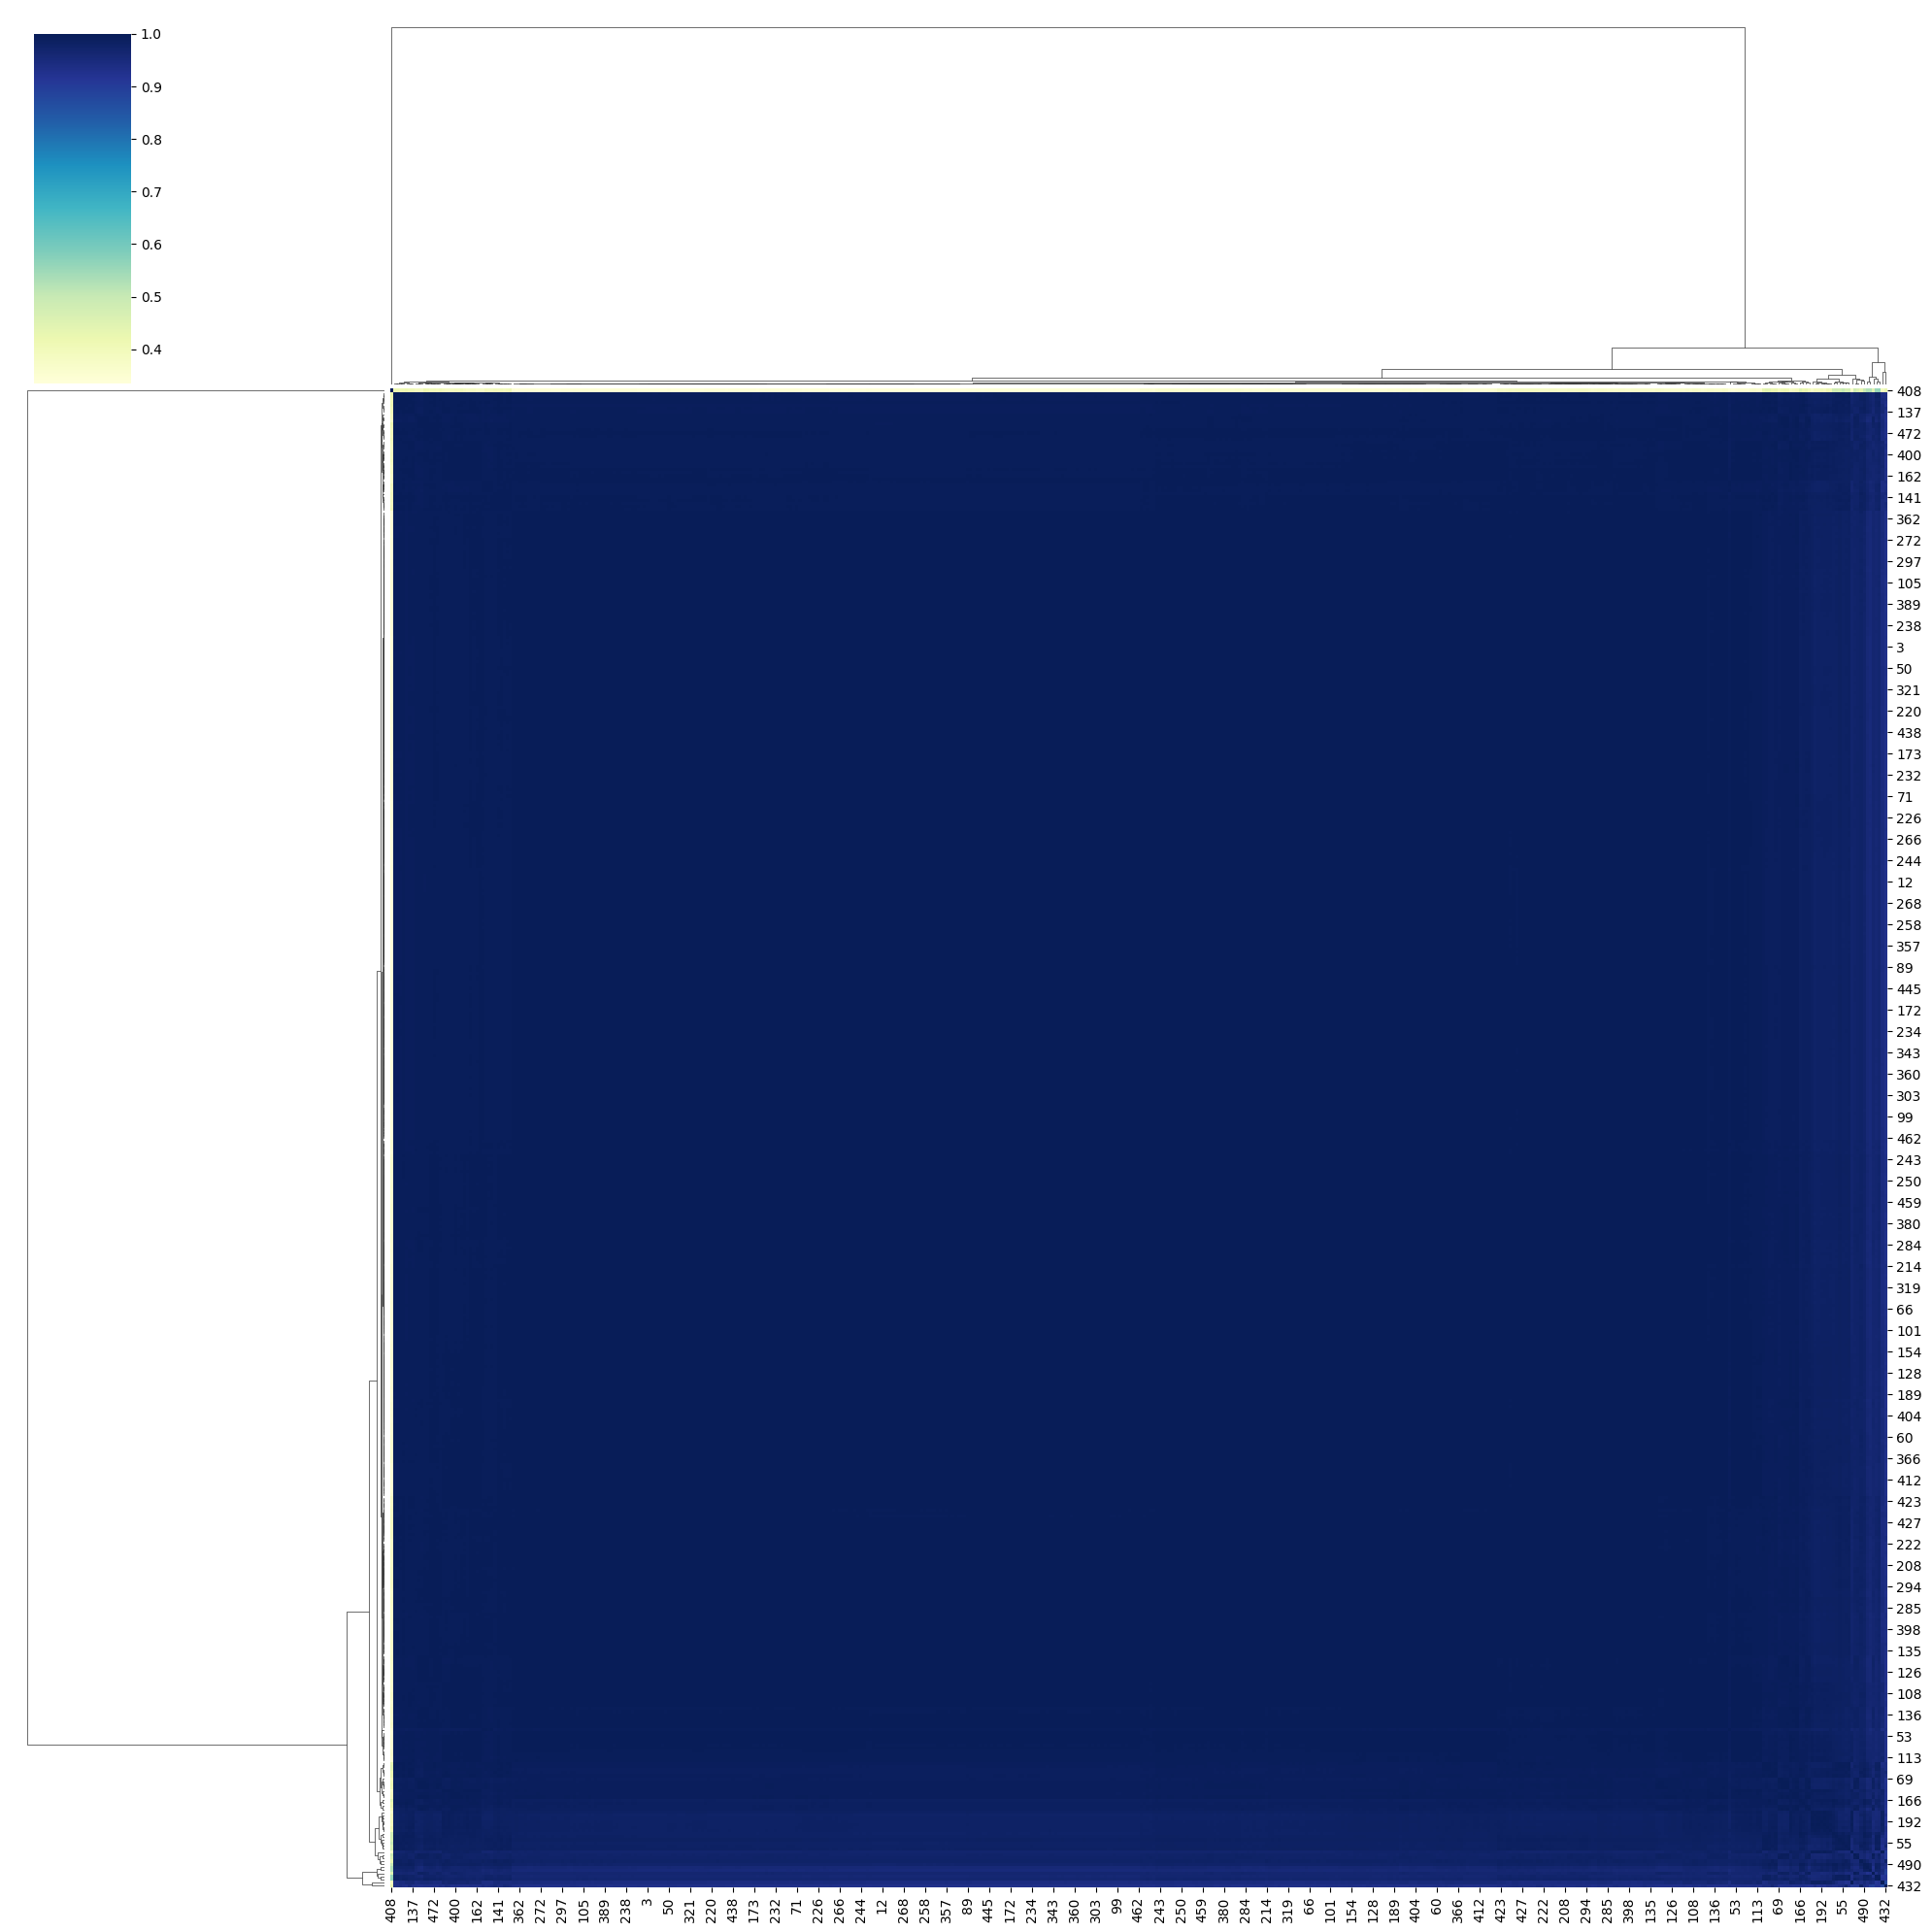

In [46]:
correlations_analysis.main(data_reduced,3)